In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib

In [40]:
df = pd.read_csv("dataset_indian_crop_price.csv")
print("Shape:", df.shape)
print(df.columns)
df.head()

Shape: (48000, 15)
Index(['Unnamed: 0', 'Date', 'State', 'City', 'Crop Type', 'Season',
       'Temperature (°C)', 'Rainfall (mm)', 'Supply Volume (tons)',
       'Demand Volume (tons)', 'Transportation Cost (₹/ton)',
       'Fertilizer Usage (kg/hectare)', 'Pest Infestation (0-1)',
       'Market Competition (0-1)', 'Price (₹/ton)'],
      dtype='object')


,Unnamed: 0,Date,State,City,Crop Type,Season,Temperature (°C),Rainfall (mm),Supply Volume (tons),Demand Volume (tons),Transportation Cost (₹/ton),Fertilizer Usage (kg/hectare),Pest Infestation (0-1),Market Competition (0-1),Price (₹/ton)
0,0,2023-01,Maharashtra,Mumbai,Wheat,Kharif,37.1,204.5,3583.93,1345.60,302.65,219.62,0.12,0.72,14.33
1,1,2023-02,Maharashtra,Mumbai,Wheat,Kharif,21.2,57.8,2944.07,1698.04,393.07,263.00,0.38,0.05,41.34
2,2,2023-03,Maharashtra,Mumbai,Wheat,Kharif,36.3,129.4,3956.04,2209.66,350.68,96.37,0.87,0.33,29.03
3,3,2023-04,Maharashtra,Mumbai,Wheat,Kharif,19.5,24.3,1651.50,576.15,274.45,192.04,0.51,0.28,14.45
4,4,2023-05,Maharashtra,Mumbai,Wheat,Kharif,36.6,218.2,2173.52,1185.90,382.61,136.45,0.86,0.17,20.01


In [41]:
df = df.drop(columns=['Date', 'Unnamed: 0'])
df.head()

,State,City,Crop Type,Season,Temperature (°C),Rainfall (mm),Supply Volume (tons),Demand Volume (tons),Transportation Cost (₹/ton),Fertilizer Usage (kg/hectare),Pest Infestation (0-1),Market Competition (0-1),Price (₹/ton)
0,Maharashtra,Mumbai,Wheat,Kharif,37.1,204.5,3583.93,1345.60,302.65,219.62,0.12,0.72,14.33
1,Maharashtra,Mumbai,Wheat,Kharif,21.2,57.8,2944.07,1698.04,393.07,263.00,0.38,0.05,41.34
2,Maharashtra,Mumbai,Wheat,Kharif,36.3,129.4,3956.04,2209.66,350.68,96.37,0.87,0.33,29.03
3,Maharashtra,Mumbai,Wheat,Kharif,19.5,24.3,1651.50,576.15,274.45,192.04,0.51,0.28,14.45
4,Maharashtra,Mumbai,Wheat,Kharif,36.6,218.2,2173.52,1185.90,382.61,136.45,0.86,0.17,20.01


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   State                          48000 non-null  object  
 1   City                           48000 non-null  object  
 2   Crop Type                      48000 non-null  object  
 3   Season                         48000 non-null  object  
 4   Temperature (°C)               48000 non-null  float64 
 5   Rainfall (mm)                  48000 non-null  float64 
 6   Supply Volume (tons)           48000 non-null  float64 
 7   Demand Volume (tons)           48000 non-null  float64 
 8   Transportation Cost (₹/ton)    48000 non-null  float64 
 9   Fertilizer Usage (kg/hectare)  48000 non-null  float64 
 10  Pest Infestation (0-1)         48000 non-null  float64 
 11  Market Competition (0-1)       48000 non-null  float64 
 12  Price (₹/ton)                  4

In [54]:
df.describe()

,Temperature (°C),Rainfall (mm),Supply Volume (tons),Demand Volume (tons),Transportation Cost (₹/ton),Fertilizer Usage (kg/hectare),Pest Infestation (0-1),Market Competition (0-1),Price (₹/ton)
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.000000,48000.00000
mean,27.506871,150.192671,2741.641435,2452.395630,274.877028,175.541043,0.499009,0.497963,116.89444
std,7.209975,86.828567,1299.022411,1179.123853,129.760062,72.284279,0.288935,0.288970,83.09765
min,15.000000,0.000000,500.030000,400.040000,50.010000,50.010000,0.000000,0.000000,0.01000
25%,21.200000,74.800000,1615.965000,1437.940000,162.195000,112.810000,0.250000,0.250000,48.80750
50%,27.500000,150.100000,2746.650000,2455.175000,275.430000,176.550000,0.500000,0.500000,101.95000
75%,33.700000,225.500000,3859.070000,3472.887500,386.805000,237.850000,0.750000,0.750000,170.59250
max,40.000000,300.000000,4999.950000,4499.820000,499.990000,300.000000,1.000000,1.000000,422.13000


In [55]:
df.isna().sum()

State                            0
City                             0
Crop Type                        0
Season                           0
Temperature (°C)                 0
Rainfall (mm)                    0
Supply Volume (tons)             0
Demand Volume (tons)             0
Transportation Cost (₹/ton)      0
Fertilizer Usage (kg/hectare)    0
Pest Infestation (0-1)           0
Market Competition (0-1)         0
Price (₹/ton)                    0
PriceCategory                    0
dtype: int64

In [42]:
df["PriceCategory"] = pd.qcut(df["Price (₹/ton)"], q=3, labels=["Low", "Medium", "High"])

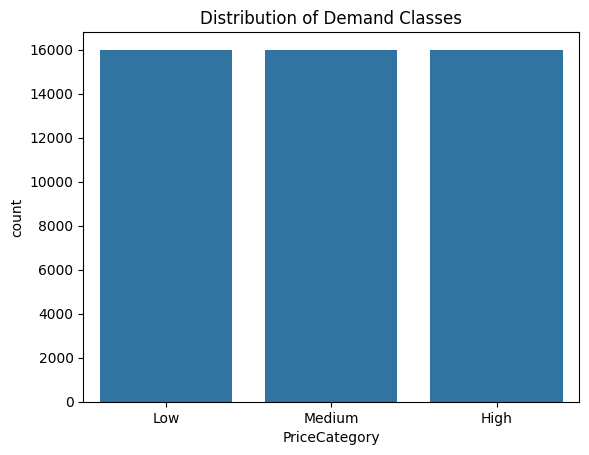

In [56]:
sns.countplot(data=df, x="PriceCategory")
plt.title("Distribution of Demand Classes")
plt.show()

In [43]:
cat_cols = ['Crop Type', 'Season', 'City', 'State']
df_encoded = pd.get_dummies(df, columns=cat_cols)

In [44]:
X = df_encoded.drop(['Price (₹/ton)', 'PriceCategory'], axis=1)
y = df_encoded['PriceCategory']

In [45]:
with open("columns.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(X.columns))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = model.predict(X_test_scaled)

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 85.02083333333333
[[2905    5  290]
 [   0 2943  257]
 [ 204  682 2314]]
              precision    recall  f1-score   support

        High       0.93      0.91      0.92      3200
         Low       0.81      0.92      0.86      3200
      Medium       0.81      0.72      0.76      3200

    accuracy                           0.85      9600
   macro avg       0.85      0.85      0.85      9600
weighted avg       0.85      0.85      0.85      9600



In [52]:
joblib.dump(model, "crop_demand_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']